# SOLUTION PROBLEM SET 10
*Ökonomische Entscheidungen und Märkte IK* <br>
Alexander Ahammer  <br>
www.alexander-ahammer.com/teaching  <br>
Date: 2020/6/29

## Exercise I

D: w(l) = -5/2*l + 71/4
S: w(l) = 5/3*l + 9/2
l* = 3.18000000000000 ; w* = 9.80000000000000
l_d(w_min) =  2.70000000000000
l_s(w_min) =  3.90000000000000
unemployment = 1.20000000000000


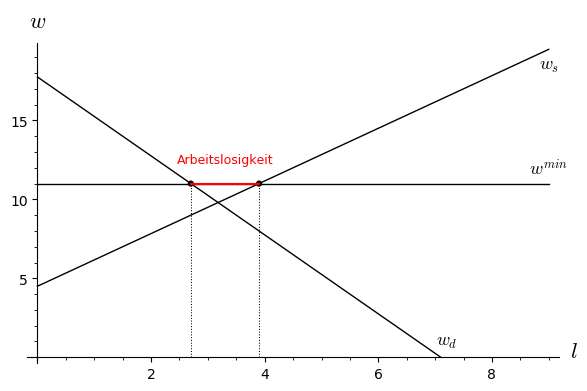

In [389]:
var('l, w')

# supply and demand
lS(w) = -2.7 + 0.6*w
lD(w) = 7.1 - 0.4*w

# inverse curves
D(l) = solve(lD(w)==l, w)[0].rhs()
print("D: w(l) =", D(l))

S(l) = solve(lS(w)==l, w)[0].rhs()
print("S: w(l) =", S(l))

# zeros on the horizontal
l_D0 = solve(D(l)==0, l)[0].rhs()
l_S0 = solve(S(l)==0, l)[0].rhs()
w_D0 = 71/4
w_S0 = 9/2

# Equilibrium
l_opt = RR(solve(D(l)==S(l), l)[0].rhs())
w_opt = D(l_opt)
print("l* =", l_opt, "; w* =", w_opt)

# plot
p_D = plot(D(l), (l, 0, l_D0), ymin=0, color='black', axes_labels=['$l$', '$w$'])
p_S = plot(S(l), (l, 0, 9), ymin=0, color='black')

p_eq  = line([(0, w_opt), (l_opt, w_opt)], color='black', thickness=0.75, linestyle=':')
p_eq += line([(l_opt, 0), (l_opt, w_opt)], color='black', thickness=0.75, linestyle=':')
p_eq += point((l_opt, w_opt), size=20, color='black')

# define minimum wage
w_min = 11

# axis values
print("l_d(w_min) = ", lD(w_min))
print("l_s(w_min) = ", lS(w_min))

u = lS(w_min) - lD(w_min)
print("unemployment =", u)

# plot min wage
p_minwage  = line([(0, w_min), (9, w_min)], color='black', linestyle="-")
p_minwage += text("$w^{min}$", (9, 12), fontsize=13, color='black')
p_minwage += line([(lD(w_min), w_min), (lS(w_min), w_min)], color='red', thickness=1.5, linestyle='-')
p_minwage += text("Arbeitslosigkeit", (3.3, 12.5), fontsize=9, color='red')
p_minwage += line([(lD(w_min), 0), (lD(w_min), w_min)], color='black', thickness=0.75, linestyle=':')
p_minwage += line([(lS(w_min), 0), (lS(w_min), w_min)], color='black', thickness=0.75, linestyle=':')
p_minwage += point((lD(w_min), w_min), size=20, color='black')
p_minwage += point((lS(w_min), w_min), size=20, color='black')
p_minwage += text("$w_s$", (9, 18.5), fontsize=13, color='black')
p_minwage += text("$w_d$", (7.2, 1), fontsize=13, color='black')

# everything together
p_market = p_D + p_S + p_minwage
p_market

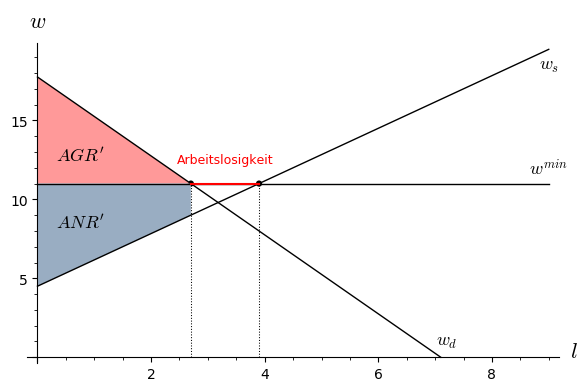

In [390]:
# plot new rents
p_market + p_eq
p_KR  = polygon([(0, w_D0), (lD(w_min), w_min), (0, w_min)], rgbcolor='#ff9999', aspect_ratio='automatic')
p_KR += text("$AGR'$", (.75, 12.75), fontsize=13, color='black')
p_PR  = polygon([(0, w_min), (lD(w_min), w_min), (lD(w_min), S(lD(w_min))), (0, w_S0)], rgbcolor='#99adc2', aspect_ratio='automatic')
p_PR += text("$ANR'$", (.75, 8.5), fontsize=13, color='black')
p_rents = p_market + p_KR + p_PR
p_rents

In [391]:
# calculate rents
AGR = ((w_D0 - w_min) * lD(w_min))/2
print("AGR' =", AGR)

ANR = ((w_min - S(lD(w_min))) * lD(w_min)) + ((S(lD(w_min)) - w_S0) * lD(w_min)) / 2
print("ANR' =", ANR)

NW = AGR + ANR
print("NW' =", NW)

DWL = 21.0675 - NW
print("DWL =", DWL)

AGR' = 9.11250000000000
ANR' = 11.4750000000000
NW' = 20.5875000000000
DWL = 0.480000000000004


In [392]:
# test with integration
print(S(lD(w_min)))
print(lD(w_min))

AGR_int = D(l).integral(l, 0, lD(w_min)) - (w_min*lD(w_min))
print("AGR integrated =", AGR_int)

ANR_int = (w_min*lD(w_min)) - S(l).integral(l, 0, lD(w_min))
print("ANR integrated =", ANR_int)

NW_int = D(l).integral(l, 0, lD(w_min)) - S(l).integral(l, 0, lD(w_min))
print("NW integrated =", NW_int)

DWL = D(l).integral(l, lD(w_min), l_opt) - S(l).integral(l, lD(w_min), l_opt)
print("DWL integrated =", DWL)

9.00000000000000
2.70000000000000
AGR integrated = 9.1125
ANR integrated = 11.4750000000000
NW integrated = 20.5875
DWL integrated = 0.4799999999999969


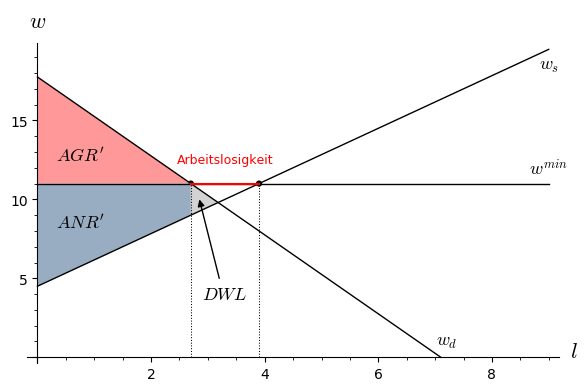

In [393]:
# plot with DWL
p_DWL = polygon([(lD(w_min), w_min), (l_opt, w_opt), (lD(w_min), S(lD(w_min)))], color='lightgray', aspect_ratio='automatic')
p_DWL += arrow2d((3.2, 5), (2.85, 10), color='black', width=1, arrowsize=2)
p_DWL += text("$DWL$", (3.3, 4), fontsize=13, color='black')
p_rents + p_DWL

In [394]:
# export figures
p_market.save('E:/Dropbox/teaching/oem/problem_sets/solutions/diags/PS10_1.pdf')
p_rents.save('E:/Dropbox/teaching/oem/problem_sets/solutions/diags/PS10_2.pdf')
(p_rents + p_DWL).save('E:/Dropbox/teaching/oem/problem_sets/solutions/diags/PS10_3.pdf')

In (b) there are no changes to the market situation because each minimum wage below the market clearing wage $w^*=9.8$ is non-binding.

## Exercise II

In [14]:
var('q', 'p', 'C')

# demand function
Q(p) = 13600 - 4*p
P(q) = solve(q == Q(p), p)[0].rhs()
print("p(q) =", P(q))

# cost function
C(q) = 731000 + 400*q + 0.75*q^2

p(q) = -1/4*q + 3400


Careful, here we have a monopolist. The monopolist sets the profit-maximizing price where $MR(q) = MC(q)$.

### (a)

In [15]:
# calculate marginal revenue and marginal cost
TR(q) = P(q)*q
MR(q) = TR.diff(q)
print("MR(q) =", MR(q))

MC(q) = C(q).diff(q)
print("MC(q) =", MC(q))

pi(q) = (TR(q) - C(q)).full_simplify()
print("pi(q) =", pi(q))

MR(q) = -1/2*q + 3400
MC(q) = 1.50000000000000*q + 400
pi(q) = -1.0*q^2 + 3000.0*q - 731000.0


In [16]:
# equilibrium
q_opt = solve(MR(q) == MC(q), q)[0].rhs()
print("q^m =", q_opt)

p_opt = P(q_opt)
print("p^m =", p_opt)

pi_opt = pi(q_opt)
print("pi^m =", pi_opt)

q^m = 1500
p^m = 3025
pi^m = 1519000.0


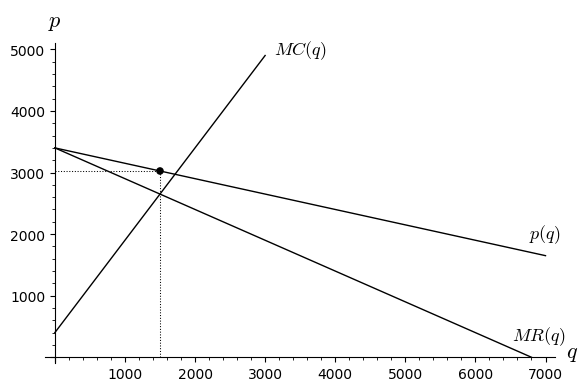

In [17]:
# plot market
D0 = solve(P(q) == 0, q)[0].rhs()
MR0 = solve(MR(q) == 0, q)[0].rhs()

p_D = plot(P(q), (q, 0, 7000), color='black', axes_labels=['$q$', '$p$'])
p_MR = plot(MR(q), (q, 0, MR0), color='black')
p_MC = plot(MC(q), (q, 0, 3000), color='black')
p_market  = p_D + p_MR + p_MC
p_market += line([(q_opt, 0), (q_opt, p_opt)], color='black', thickness=0.75, linestyle=':')
p_market += line([(0, p_opt), (q_opt, p_opt)], color='black', thickness=0.75, linestyle=':')
p_market += point((q_opt, p_opt), size=30, color='black')
p_market += text("$p(q)$", (7000, 2000), fontsize=13, color='black')
p_market += text("$MR(q)$", (6900, 350), fontsize=13, color='black')
p_market += text("$MC(q)$", (3500, 5000), fontsize=13, color='black')
p_market

### (b)

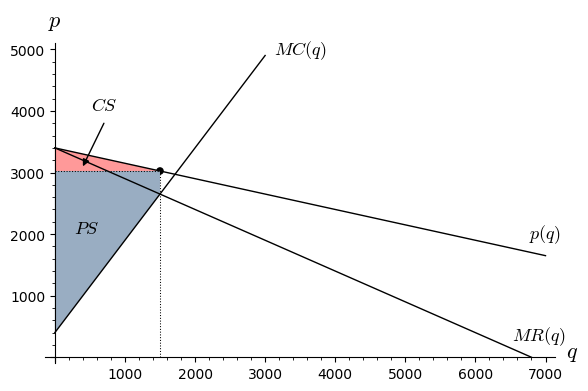

In [18]:
# plot rents
p_rents  = polygon([(0, P(0)), (q_opt, p_opt), (0, p_opt)], ymax=5000, rgbcolor='#ff9999', aspect_ratio='automatic')
p_rents += polygon([(0, p_opt), (q_opt, p_opt), (q_opt, MC(q_opt)), (0, MC(0))], ymax=5000, rgbcolor='#99adc2', aspect_ratio='automatic')
p_rents += text("$PS$", (450, 2100), fontsize=13, color='black')
p_rents += text("$CS$", (700, 4100), fontsize=13, color='black')
p_rents += arrow2d((700, 3800,), (400, 3100), color='black', width=1, arrowsize=2)
p_market + p_rents

In [19]:
# calculate rents
CS = ((P(0) - p_opt)*q_opt)/2
print("CS =", CS)

PS = ((p_opt - MC(q_opt))*q_opt) + (((MC(q_opt) - MC(0)) * q_opt)/2)
print("PS =", PS)

NW = CS+PS
print("NW =", NW)

CS = 281250
PS = 2.25000000000000e6
NW = 2.53125000000000e6


In [20]:
# integrate to double check
CS_int = P(q).integral(q, 0, q_opt) - (p_opt*q_opt)
print(CS_int)

PS_int = (p_opt*q_opt) - MC(q).integral(q, 0, q_opt)
print(PS_int)

281250
2250000.0


Let's compare this with the perfect competition equilibrium

In [21]:
q_pc = solve(MC(q)==P(q), q)[0].rhs()
print("q_pc =", RR(q_pc))

p_pc = P(q_pc)
print("p_pc =", RR(p_pc))

DWL = P(q).integral(q, q_opt, q_pc) - MC(q).integral(q, q_opt, q_pc)
print("DWL =", DWL)

DWL_alt = (P(q)-MC(q)).integral(q, q_opt, q_pc)
print("DWL (under one integral) =", DWL_alt)

q_pc = 1714.28571428571
p_pc = 2971.42857142857
DWL = 40178.571428571595
DWL (under one integral) = 40178.57142857136


In [22]:
# export figures
p_market.save('E:/Dropbox/teaching/oem/problem_sets/solutions/diags/PS10_4.pdf')
(p_market + p_rents).save('E:/Dropbox/teaching/oem/problem_sets/solutions/diags/PS10_5.pdf')

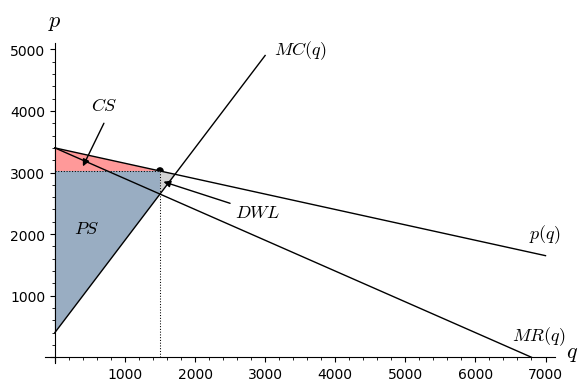

In [23]:
p_DWL  = polygon([(q_opt, p_opt), (q_pc, p_pc), (q_opt, MC(q_opt))], color='lightgray', aspect_ratio='automatic')
p_DWL += arrow2d((2500, 2500), (1550, 2850), color='black', width=1, arrowsize=2)
p_DWL += text("$DWL$", (2900, 2350), fontsize=13, color='black')
p_market + p_rents + p_DWL

In [24]:
# export again
(p_market + p_rents + p_DWL).save('E:/Dropbox/teaching/oem/problem_sets/solutions/diags/PS10_6.pdf')